# 最小二乘法

## 什么是最小二乘法

- 某次实验得到了右图的4个数据点，我们希望找出一条和这4个点最匹配的直线$𝑦=𝑎𝑥+𝑏$
- “最完美”的情况是这4个点都在直线上

|x|y|
|:---:|:---:|
|1|6|
|2|5|
|3|7|
|4|10|

![匹配的直线](../images/scipy_451.png)

- 对每一个点，可以计算它到“最佳拟合直线”之间的误差
- 最小二乘法的目标是使得所有数据点误差的平方和最小
    - 即$[6−(𝑎+𝑏)]^2+[5−(2𝑎+𝑏)]^2+[7−(3𝑎+𝑏)]^2+[10−(4𝑎+𝑏)]^2$最小
    
![最小二乘法](../images/scipy_452.png)    

## 最小二乘法的由来

- 1801年，意大利天文学家朱赛普·皮亚齐发现了第一颗小行星谷神星。经过40天的跟踪观测后，由于谷神星运行至太阳背后，使得皮亚齐失去了谷神星的位置。随后全世界的科学家利用皮亚齐的观测数据开始寻找谷神星，但是根据大多数人计算的结果来寻找谷神星都没有结果。时年24岁的高斯也计算了谷神星的轨道。奥地利天文学家海因里希·奥伯斯根据高斯计算出来的轨道重新发现了谷神星。


- 高斯当时使用的方法就是最小二乘法
![最小二乘法](../images/scipy_453.png)

## 使用Scipy求解最小二乘问题

- `scipy.optimize.leastsq(func, x0, args=())`
    - 最小化目标：$arg \min\limits_{𝑝}⁡(𝑠𝑢𝑚(𝑓𝑢𝑛𝑐(𝑝)∗∗2, 𝑎𝑥𝑖𝑠=0))$
    - `func`：定义每个数据点的误差函数，函数第一个参数为需要求解的目标系数，结果返回一个向量
    - `x0`：初始参数
    - `args`：指定`func`函数的其他参数，顺序与`func`中定义的顺序相同

In [1]:
import numpy as np
from scipy.optimize import leastsq

import matplotlib
from matplotlib import pyplot as plt

In [2]:
# 定义误差函数
# param: 需要求解的直线系数[a, b]，直线方程为 y = ax + b
# x: 观测数据x
# y: 观测数据y
def error_fun(param, x, y):
    expect_y = param[0] * x + param[1]
    err = y - expect_y
    return err

In [3]:
# 观测数据
x = np.array([1,2,3,4])
y = np.array([6,5,7,10])
# 初始化系数
init_param = np.array([0.1, 0.1])

# 求解
res, _ = leastsq(error_fun, init_param, args=(x, y))

print('直线方程：y = {:.3f} x + {:.3f}'.format(res[0], res[1]))

直线方程：y = 1.400 x + 3.500


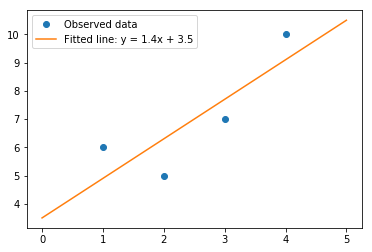

In [4]:
# 绘制图像
px = np.linspace(0, 5, 50)
py = res[0] * px + res[1]
plt.plot(x, y, 'o', label='Observed data')
plt.plot(px, py, '-', label='Fitted line: y = {:.1f}x + {:.1f}'.format(res[0], res[1]))
plt.legend(loc='upper left')
plt.show()

## 练习

In [5]:
# 拟合二次曲线：y = a x^2 + b x + c
# 数据文件：4.5_ex1_data.csv

# 定义误差函数
# param = [a, b, c]
def error_fun(param, x, y):
    expect_y = param[0] * x**2 + param[1] * x + param[2]
    return y - expect_y

In [7]:
# 载入数据
import os

filename = os.path.join('..', 'data', 'scipy_exdata.csv')
data = np.loadtxt(filename, dtype=np.float_, delimiter=',')

# 初始化系数
init_param = np.array([0.1, 0.1, 0.1])

# 求解
res, _ = leastsq(error_fun, init_param, args=(data[:, 0], data[:, 1]))

print('二次曲线：y = {:.3f} x^2 + {:.3f} x + {:.3f}'.format(res[0], res[1], res[2]))

二次曲线：y = 2.985 x^2 + -2.030 x + 3.062


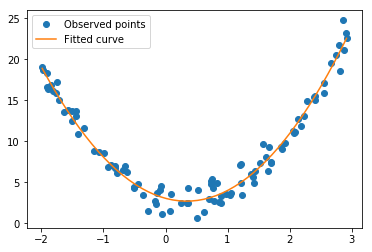

In [8]:
# 绘制曲线
px = np.linspace(min(data[:, 0]), max(data[:, 0]))
py = res[0] * px**2 + res[1] * px + res[2]
plt.plot(data[:, 0], data[:, 1], 'o', label='Observed points')
plt.plot(px, py, '-', label='Fitted curve')
plt.legend(loc='best')
plt.show()